# Prediction of Graduate Admissions from an Indian perspective

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv(r"C:\Users\AJAYRAJ\Downloads\archive (2)\Admission_Predict.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


# EDA

In [3]:
print(df.shape)

(400, 9)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
df.nunique()

Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
cat_cols=['University Rating', 'SOP','LOR ','Research']

In [8]:
num_cols=['GRE Score', 'TOEFL Score','CGPA']

In [9]:
df[cat_cols]=df[cat_cols].astype('category')

In [10]:
df.dtypes

Serial No.              int64
GRE Score               int64
TOEFL Score             int64
University Rating    category
SOP                  category
LOR                  category
CGPA                  float64
Research             category
Chance of Admit       float64
dtype: object

### BOX PLOT OF DISTRIBUTION OF GRE SCORE

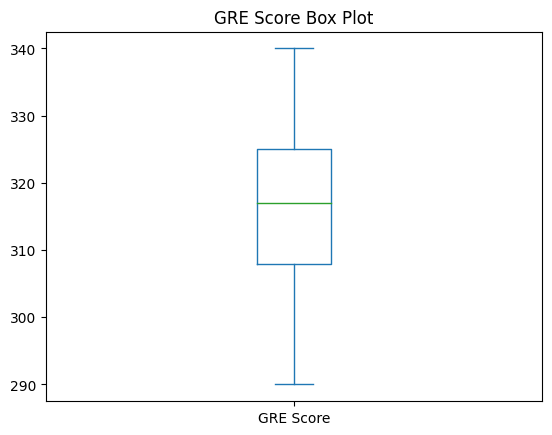

In [11]:
df['GRE Score'].plot(kind='box', title="GRE Score Box Plot")
plt.show()

In [12]:
print("Minimum GRE Score : ", df['GRE Score'].min())
print("Maximum GRE Score : ", df['GRE Score'].max())
print("Average GRE Score : ", df['GRE Score'].mean())
print("Std GRE Score : ", df['GRE Score'].std())

Minimum GRE Score :  290
Maximum GRE Score :  340
Average GRE Score :  316.8075
Std GRE Score :  11.473646113500475


### PIE CHART SHOWING UNIVERSITY RANKING DISTRIBUTION

In [13]:
df['University Rating'].value_counts()

University Rating
3    133
2    107
4     74
5     60
1     26
Name: count, dtype: int64

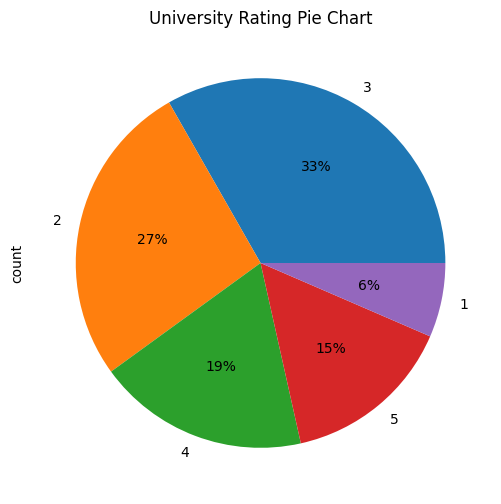

In [14]:
df['University Rating'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(8,6),
                                            title="University Rating Pie Chart")
plt.show()

### Count plot of Research

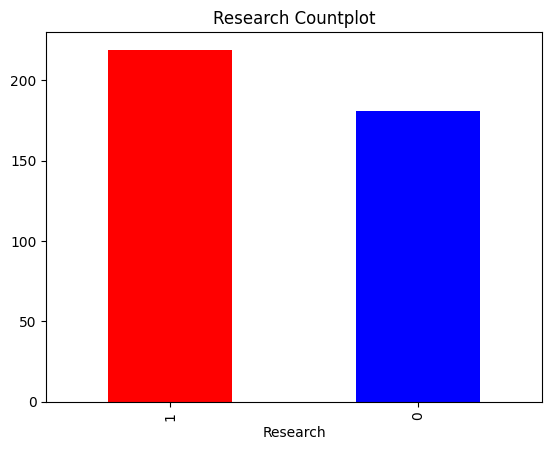

In [15]:
df.Research.value_counts().plot(kind='bar',title="Research Countplot",color=["red","blue"])
plt.show()

### Admission chance w.r.t GRE Score 

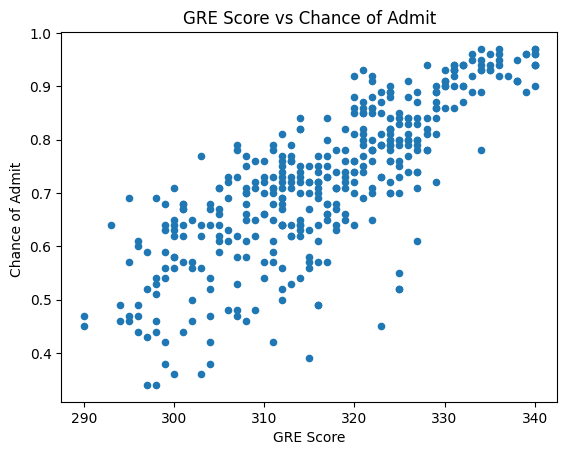

In [16]:
df.plot(kind="scatter", x='GRE Score', y = 'Chance of Admit ', title="GRE Score vs Chance of Admit")
plt.show()

### Admission chance w.r.t TOEFL Score 

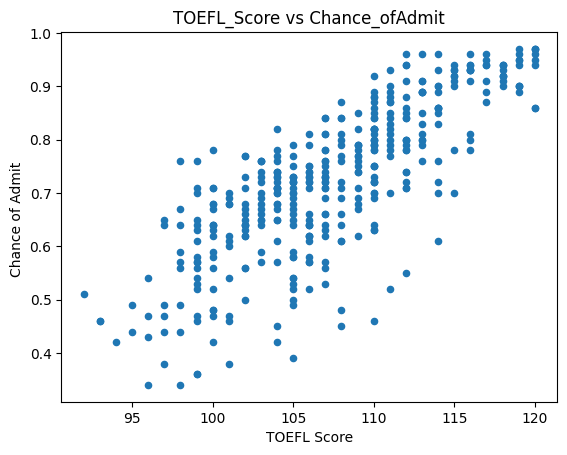

In [17]:
df.plot(kind="scatter", x='TOEFL Score', y = 'Chance of Admit ' , title="TOEFL_Score vs Chance_ofAdmit")
plt.show()

### Admission chance w.r.t University Rankings

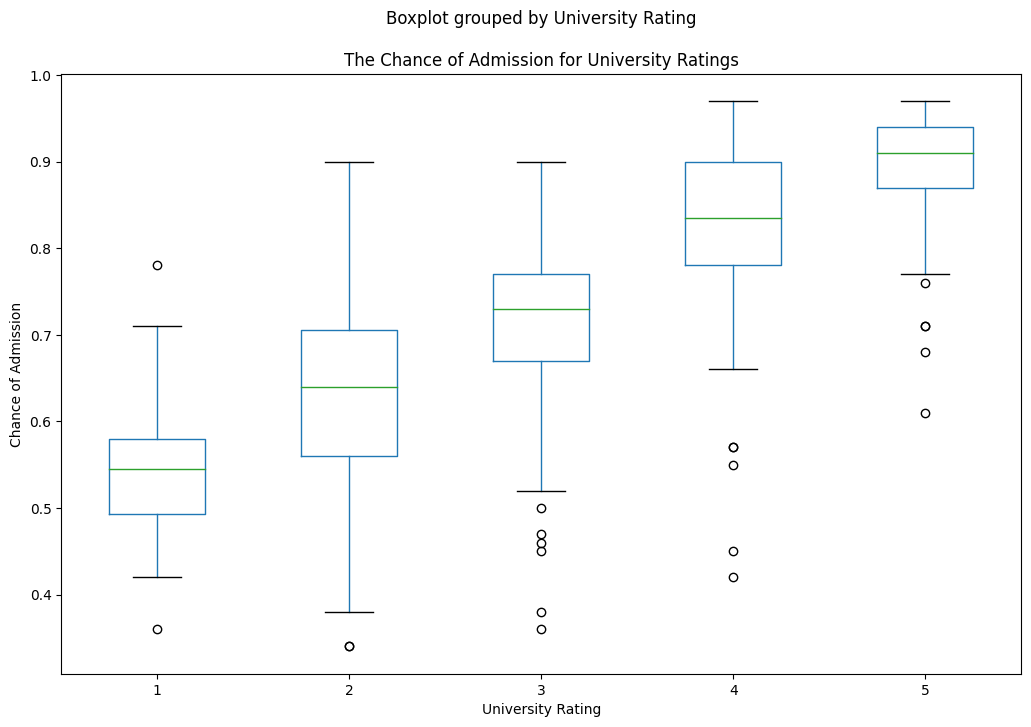

In [18]:
df.boxplot(column='Chance of Admit ',by='University Rating',grid=False,figsize=(12,8))
plt.title('The Chance of Admission for University Ratings')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')
plt.show()

In [19]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [20]:
df.drop(columns='Serial No.', inplace = True)

In [21]:
y=df['Chance of Admit ']

In [22]:
X=df.drop(['Chance of Admit '],axis=1)

# Train Test Split

In [23]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=123)

In [28]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(280, 7)
(120, 7)
(280,)
(120,)


# Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(X_train[num_cols])
X_train_std = pd.DataFrame(scaler.transform(X_train[num_cols]), columns=X_train[num_cols].columns)
X_val_std = pd.DataFrame(scaler.transform(X_val[num_cols]), columns=X_val[num_cols].columns)

In [30]:
X_train_std

,GRE Score,TOEFL Score,CGPA
0,0.242626,0.447074,0.751982
1,-0.018664,0.447074,0.317262
2,1.200686,1.271718,1.253583
3,-0.192856,-0.542497,0.718542
4,-1.063820,-0.872355,0.233662
...,...,...,...
275,-0.279953,-0.542497,0.099902
276,1.374879,1.931432,1.086382
277,-0.192856,-0.047711,-0.535458
278,0.678108,0.447074,0.935902


In [31]:
X_val_std

,GRE Score,TOEFL Score,CGPA
0,1.200686,0.941860,1.203422
1,-0.279953,-0.047711,-0.150898
2,0.591011,-0.047711,-0.067298
3,-0.367049,0.282146,0.166782
4,-0.715435,-0.212640,-0.585618
...,...,...,...
115,-1.325110,-1.696998,-1.187538
116,0.939397,0.117217,0.902462
117,1.287783,1.271718,1.287023
118,2.071650,0.776932,1.788623


# Dummification

In [32]:
X_train_dum = pd.get_dummies((X_train[cat_cols]),drop_first=True)
X_val_dum = pd.get_dummies((X_val[cat_cols]),drop_first=True)

In [33]:
X_train_dum

,University Rating_2,University Rating_3,University Rating_4,University Rating_5,SOP_1.5,SOP_2.0,SOP_2.5,SOP_3.0,SOP_3.5,SOP_4.0,...,SOP_5.0,LOR _1.5,LOR _2.0,LOR _2.5,LOR _3.0,LOR _3.5,LOR _4.0,LOR _4.5,LOR _5.0,Research_1
177,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
105,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,True
5,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
288,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
279,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
98,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True
322,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
382,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [34]:
X_val_dum

,University Rating_2,University Rating_3,University Rating_4,University Rating_5,SOP_1.5,SOP_2.0,SOP_2.5,SOP_3.0,SOP_3.5,SOP_4.0,...,SOP_5.0,LOR _1.5,LOR _2.0,LOR _2.5,LOR _3.0,LOR _3.5,LOR _4.0,LOR _4.5,LOR _5.0,Research_1
234,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
42,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
303,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
155,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
342,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
260,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True
188,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
284,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True


## Resetting index to avoid null values during merge

In [35]:
X_train_std = X_train_std.reset_index()
X_train_std

,index,GRE Score,TOEFL Score,CGPA
0,0,0.242626,0.447074,0.751982
1,1,-0.018664,0.447074,0.317262
2,2,1.200686,1.271718,1.253583
3,3,-0.192856,-0.542497,0.718542
4,4,-1.063820,-0.872355,0.233662
...,...,...,...,...
275,275,-0.279953,-0.542497,0.099902
276,276,1.374879,1.931432,1.086382
277,277,-0.192856,-0.047711,-0.535458
278,278,0.678108,0.447074,0.935902


In [36]:
X_train_std = X_train_std.drop(["index"], axis=1)
X_train_std

,GRE Score,TOEFL Score,CGPA
0,0.242626,0.447074,0.751982
1,-0.018664,0.447074,0.317262
2,1.200686,1.271718,1.253583
3,-0.192856,-0.542497,0.718542
4,-1.063820,-0.872355,0.233662
...,...,...,...
275,-0.279953,-0.542497,0.099902
276,1.374879,1.931432,1.086382
277,-0.192856,-0.047711,-0.535458
278,0.678108,0.447074,0.935902


In [37]:
X_val_std = X_val_std.reset_index()
X_val_std

,index,GRE Score,TOEFL Score,CGPA
0,0,1.200686,0.941860,1.203422
1,1,-0.279953,-0.047711,-0.150898
2,2,0.591011,-0.047711,-0.067298
3,3,-0.367049,0.282146,0.166782
4,4,-0.715435,-0.212640,-0.585618
...,...,...,...,...
115,115,-1.325110,-1.696998,-1.187538
116,116,0.939397,0.117217,0.902462
117,117,1.287783,1.271718,1.287023
118,118,2.071650,0.776932,1.788623


In [38]:
X_val_std = X_val_std.drop(["index"], axis=1)
X_val_std

,GRE Score,TOEFL Score,CGPA
0,1.200686,0.941860,1.203422
1,-0.279953,-0.047711,-0.150898
2,0.591011,-0.047711,-0.067298
3,-0.367049,0.282146,0.166782
4,-0.715435,-0.212640,-0.585618
...,...,...,...
115,-1.325110,-1.696998,-1.187538
116,0.939397,0.117217,0.902462
117,1.287783,1.271718,1.287023
118,2.071650,0.776932,1.788623


In [39]:
X_train_dum = X_train_dum.reset_index()
X_train_dum

,index,University Rating_2,University Rating_3,University Rating_4,University Rating_5,SOP_1.5,SOP_2.0,SOP_2.5,SOP_3.0,SOP_3.5,...,SOP_5.0,LOR _1.5,LOR _2.0,LOR _2.5,LOR _3.0,LOR _3.5,LOR _4.0,LOR _4.5,LOR _5.0,Research_1
0,177,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,105,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
2,5,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,288,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,279,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,230,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
276,98,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True
277,322,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
278,382,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [40]:
X_train_dum = X_train_dum.drop(["index"], axis=1)
X_train_dum

,University Rating_2,University Rating_3,University Rating_4,University Rating_5,SOP_1.5,SOP_2.0,SOP_2.5,SOP_3.0,SOP_3.5,SOP_4.0,...,SOP_5.0,LOR _1.5,LOR _2.0,LOR _2.5,LOR _3.0,LOR _3.5,LOR _4.0,LOR _4.5,LOR _5.0,Research_1
0,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,True
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
276,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True
277,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
278,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [41]:
X_val_dum = X_val_dum.reset_index()
X_val_dum

,index,University Rating_2,University Rating_3,University Rating_4,University Rating_5,SOP_1.5,SOP_2.0,SOP_2.5,SOP_3.0,SOP_3.5,...,SOP_5.0,LOR _1.5,LOR _2.0,LOR _2.5,LOR _3.0,LOR _3.5,LOR _4.0,LOR _4.5,LOR _5.0,Research_1
0,234,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
1,42,True,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
2,303,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,True
3,155,False,True,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,342,False,True,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,93,True,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
116,260,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True
117,188,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
118,284,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True


In [42]:
X_val_dum = X_val_dum.drop(["index"], axis=1)
X_val_dum

,University Rating_2,University Rating_3,University Rating_4,University Rating_5,SOP_1.5,SOP_2.0,SOP_2.5,SOP_3.0,SOP_3.5,SOP_4.0,...,SOP_5.0,LOR _1.5,LOR _2.0,LOR _2.5,LOR _3.0,LOR _3.5,LOR _4.0,LOR _4.5,LOR _5.0,Research_1
0,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
1,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
3,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
116,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True
117,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
118,False,False,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True


### Concating and creating final df

In [43]:
final_X_train = pd.concat([X_train_std, X_train_dum], axis=1)

In [44]:
final_X_val = pd.concat([X_val_std, X_val_dum], axis=1)

In [45]:
final_X_train.isnull().sum()

GRE Score              0
TOEFL Score            0
CGPA                   0
University Rating_2    0
University Rating_3    0
University Rating_4    0
University Rating_5    0
SOP_1.5                0
SOP_2.0                0
SOP_2.5                0
SOP_3.0                0
SOP_3.5                0
SOP_4.0                0
SOP_4.5                0
SOP_5.0                0
LOR _1.5               0
LOR _2.0               0
LOR _2.5               0
LOR _3.0               0
LOR _3.5               0
LOR _4.0               0
LOR _4.5               0
LOR _5.0               0
Research_1             0
dtype: int64

In [46]:
final_X_val.isnull().sum()

GRE Score              0
TOEFL Score            0
CGPA                   0
University Rating_2    0
University Rating_3    0
University Rating_4    0
University Rating_5    0
SOP_1.5                0
SOP_2.0                0
SOP_2.5                0
SOP_3.0                0
SOP_3.5                0
SOP_4.0                0
SOP_4.5                0
SOP_5.0                0
LOR _1.5               0
LOR _2.0               0
LOR _2.5               0
LOR _3.0               0
LOR _3.5               0
LOR _4.0               0
LOR _4.5               0
LOR _5.0               0
Research_1             0
dtype: int64

# Model Building

In [47]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [48]:
result={}

models = {'DecisionTree': DecisionTreeRegressor(),
          'Linear Regression': LinearRegression(),
          'RandomForest': RandomForestRegressor(),
          'KNeighbours': KNeighborsRegressor(n_neighbors = 2),
           'SVM': SVR()
           }


for key,value in models.items():
    temp=[]
    model =value
    model.fit(final_X_train, y_train)
    predictions = model.predict(final_X_val)
    rmse=np.sqrt(mean_squared_error(y_val, predictions))
    temp.append(rmse)
    result[key]=temp
    
    
print(result)

{'DecisionTree': [0.0974380144844232], 'Linear Regression': [0.06318981533815302], 'RandomForest': [0.06944602100432631], 'KNeighbours': [0.07844584118995729], 'SVM': [0.08696636241947606]}


In [49]:
result=pd.DataFrame(result)
result=result.T
result

,0
DecisionTree,0.097438
Linear Regression,0.063190
RandomForest,0.069446
KNeighbours,0.078446
SVM,0.086966


In [50]:
col=result.columns.to_list()
col[0]="Root Mean Squared Error"
result.columns=col
result

,Root Mean Squared Error
DecisionTree,0.097438
Linear Regression,0.063190
RandomForest,0.069446
KNeighbours,0.078446
SVM,0.086966


# Conclusion:
1. In this dataset we try to predict the Chance of Admission based on various input features. We perform the Univariate and Bivariate Analysis to see the impact of different input varibales on chance of Admit.
2. We detect the outliers in the dataset with help of Percentile Capping, and there are no outliers in the dataset.
3. We also try to find the Multicollinearity using Variance Inflation Method.
4. We also create the summary of model with the help of OLS Regression Model and see the value of different parameters.We find that the slope of University Rating and SOP is below Zero, which means these column has less important for predicting the chance of Admit.
5. At the end we find that the Ridge Regression perform very well among all the regression models.